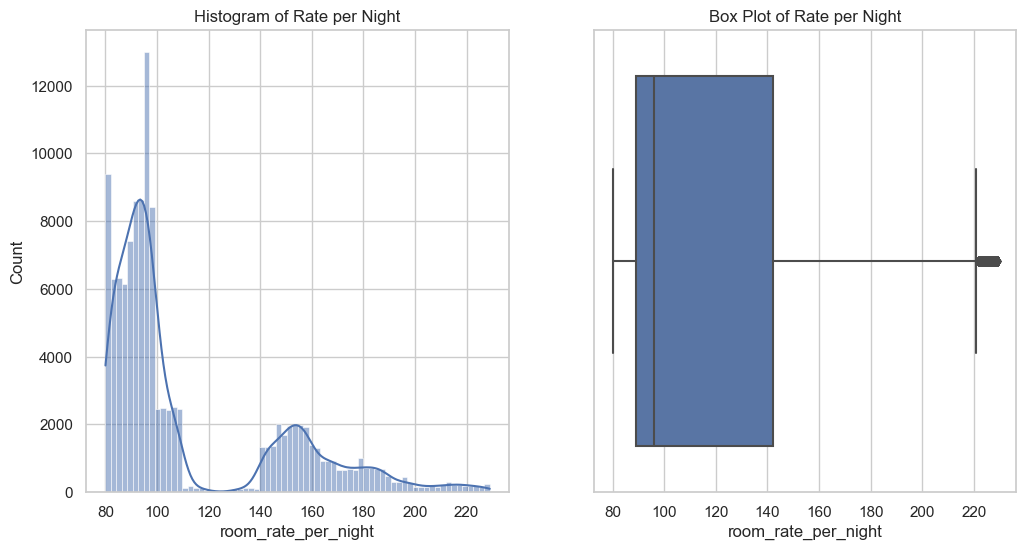

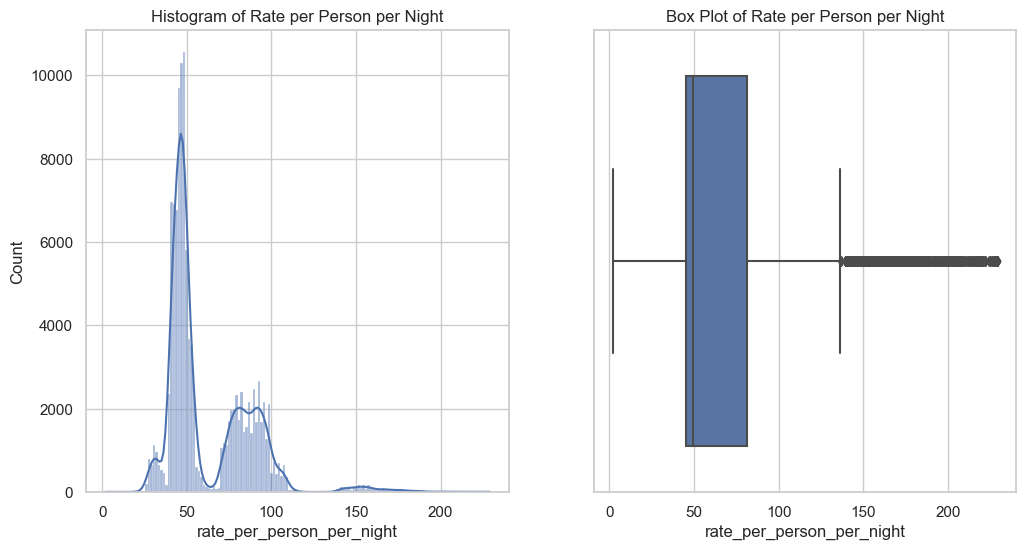

room_rate_per_night          1.290523
rate_per_person_per_night    1.611942
dtype: float64 room_rate_per_night          0.498743
rate_per_person_per_night    3.817901
dtype: float64
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.001030   
std         0.482918     106.863097           0.816887   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2015.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                

In [13]:
#problem1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('HotelBooking Datasets.csv')


# Calculate summary statistics
summary_stats = df.describe()


# Histogram for rate_per_night
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['room_rate_per_night'], kde=True)
plt.title('Histogram of Rate per Night')

# Box plot for rate_per_night
plt.subplot(1, 2, 2)
sns.boxplot(x=df['room_rate_per_night'])
plt.title('Box Plot of Rate per Night')
plt.show()


# Histogram for rate_per_person_per_night
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['rate_per_person_per_night'], kde=True)
plt.title('Histogram of Rate per Person per Night')

# Box plot for rate_per_person_per_night
plt.subplot(1, 2, 2)
sns.boxplot(x=df['rate_per_person_per_night'])
plt.title('Box Plot of Rate per Person per Night')
plt.show()


# Calculate skewness and kurtosis
skewness = df[['room_rate_per_night', 'rate_per_person_per_night']].skew()
kurtosis = df[['room_rate_per_night', 'rate_per_person_per_night']].kurtosis()

# Display skewness and kurtosis
print(skewness, kurtosis)

# Display summary statistics
print(summary_stats)

Missing values in 'country' column: 0


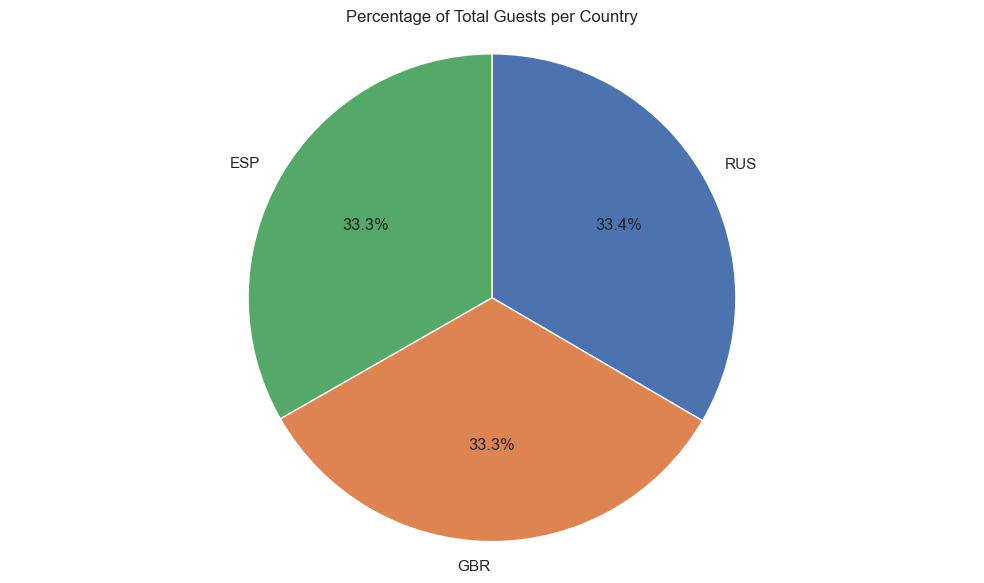


Countries with Percentage of Guests:
RUS    6.76
GBR    6.74
ESP    6.73
BRA    6.72
ITA    6.70
CHE    6.69
IND    6.66
USA    6.66
FRA    6.65
DEU    6.65
CHN    6.65
IRL    6.62
NLD    6.62
PRT    6.58
BEL    6.57
Name: country, dtype: float64


In [14]:
# Check for missing values in the 'country' column
missing_countries = df['country'].isnull().sum()
print("Missing values in 'country' column:", missing_countries)

# Calculate the percentage of total guests per country
country_counts = df['country'].value_counts(normalize=True) * 100
top_countries = country_counts.head(3)

# Round off the percentages to 2 decimal places
country_counts = country_counts.round(2)
top_countries = top_countries.round(2)

# Visualize the results using a pie chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Percentage of Total Guests per Country')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Ensure the pie chart is a circle
plt.tight_layout()
plt.show()

# Report
print("\nCountries with Percentage of Guests:")
print(country_counts)

In [15]:

#problem 2
import pandas as pd
import re

# Load the dataset from the specified file path
file_path = 'HotelBooking Datasets.csv'
df = pd.read_csv(file_path)

# Check for missing values in the dataframe
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Impute missing values in numerical columns with the mean
df['lead_time'].fillna(df['lead_time'].mean(), inplace=True)
df['adr'].fillna(df['adr'].mean(), inplace=True)
df['days_in_waiting_list'].fillna(df['days_in_waiting_list'].mean(), inplace=True)

# Impute missing values in categorical columns with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['market_segment'].fillna(df['market_segment'].mode()[0], inplace=True)
df['meal'].fillna(df['meal'].mode()[0], inplace=True)

# Impute missing values with a placeholder value
df['agent'].fillna('Unknown', inplace=True)
df['company'].fillna('Unknown', inplace=True)

# Check to ensure no missing values remain
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

# Function to categorize age groups
def categorize_age_group(age_group):
    # Extract numerical values from the age group string
    age_numbers = re.findall(r'\d+', age_group)
    if not age_numbers:
        return 'Unknown'
    ages = list(map(int, age_numbers))
    if len(ages) == 1:  # Single age value
        age = ages[0]
    else:  # Age range, take the average
        age = sum(ages) / len(ages)

    if age < 18:
        return 'Children'
    elif age <= 65:
        return 'Adults'
    else:
        return 'Senior Citizens'

# Apply the function to the guest_age_group column
df['age_category'] = df['guest_age_group'].apply(categorize_age_group)

# Display the first few rows to verify the changes
print(df[['guest_age_group', 'age_category']].head())

# Save the updated DataFrame to a new CSV file
df.to_csv('Cleaned_HotelBooking_Dataset_Updated.csv', index=False)


print(f"Cleaned dataset saved as '{'cleaned_file_path'}'")

Missing values before imputation:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              21464
company                           112937
days_in_waiting_list                   0
customer_type         

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'HotelBooking Datasets.csv'
df = pd.read_csv(file_path)

C:\Users\Anith\AppData\Local\Temp\ipykernel_24604\3240519860.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lead_time'], shade=True)
C:\Users\Anith\AppData\Local\Temp\ipykernel_24604\3240519860.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stay_duration'], shade=True)


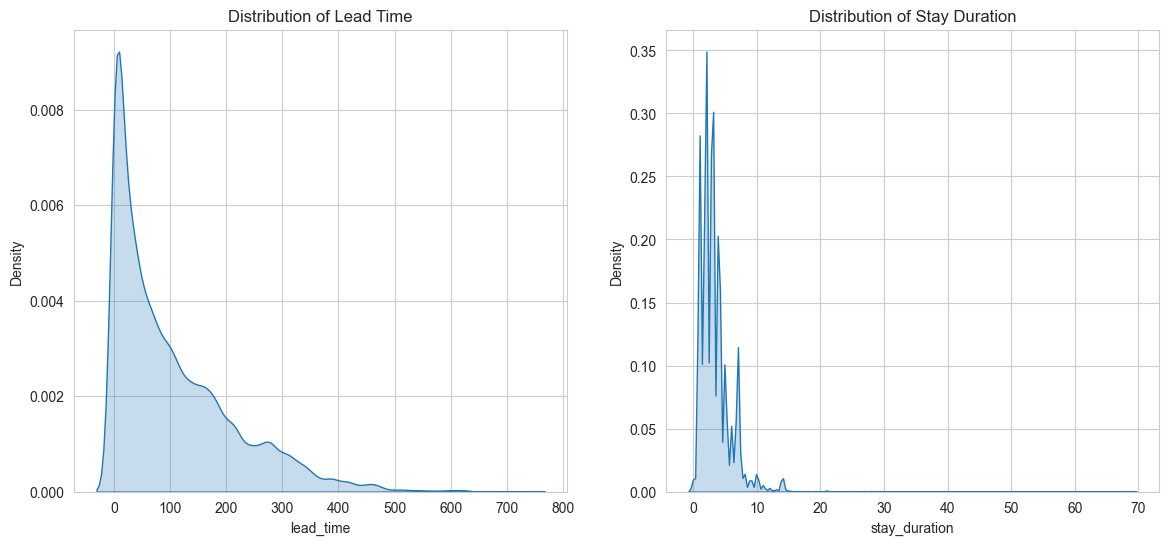

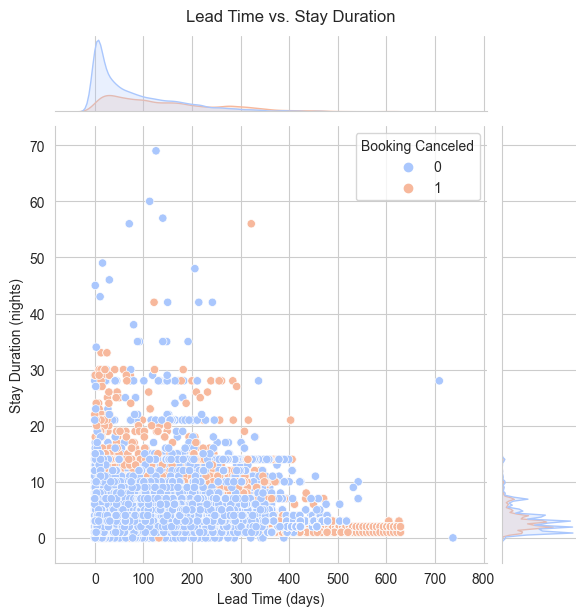

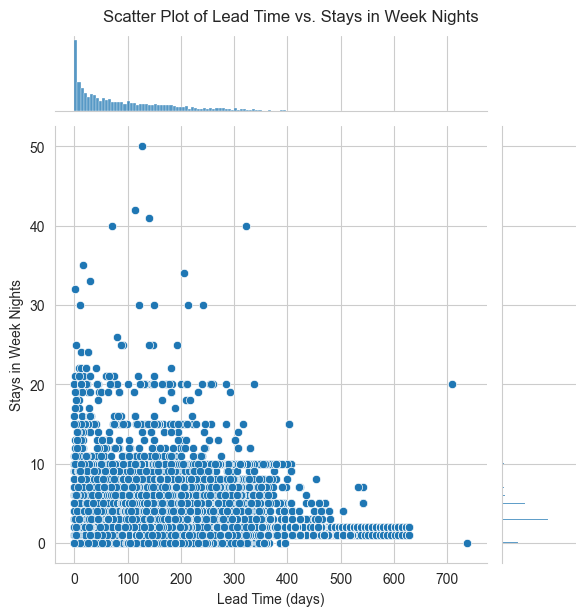

C:\Users\Anith\AppData\Local\Temp\ipykernel_24604\3240519860.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lead_time'], shade=True)


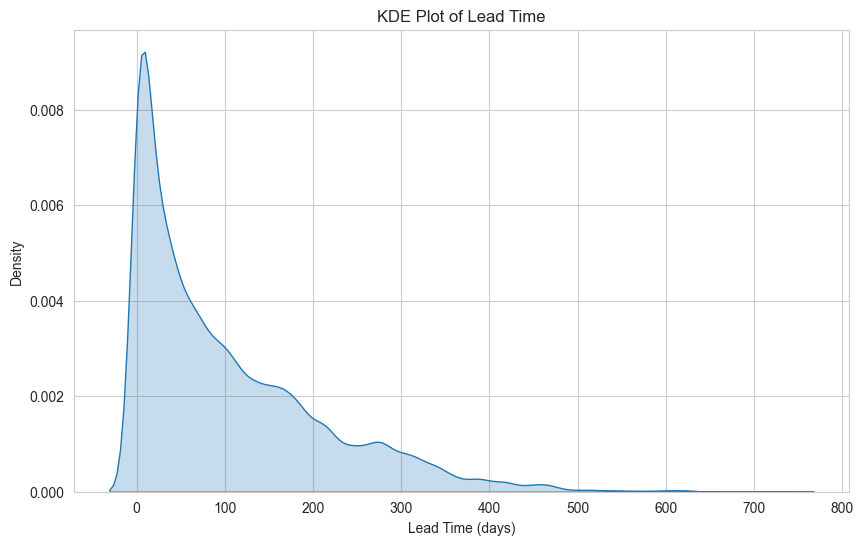

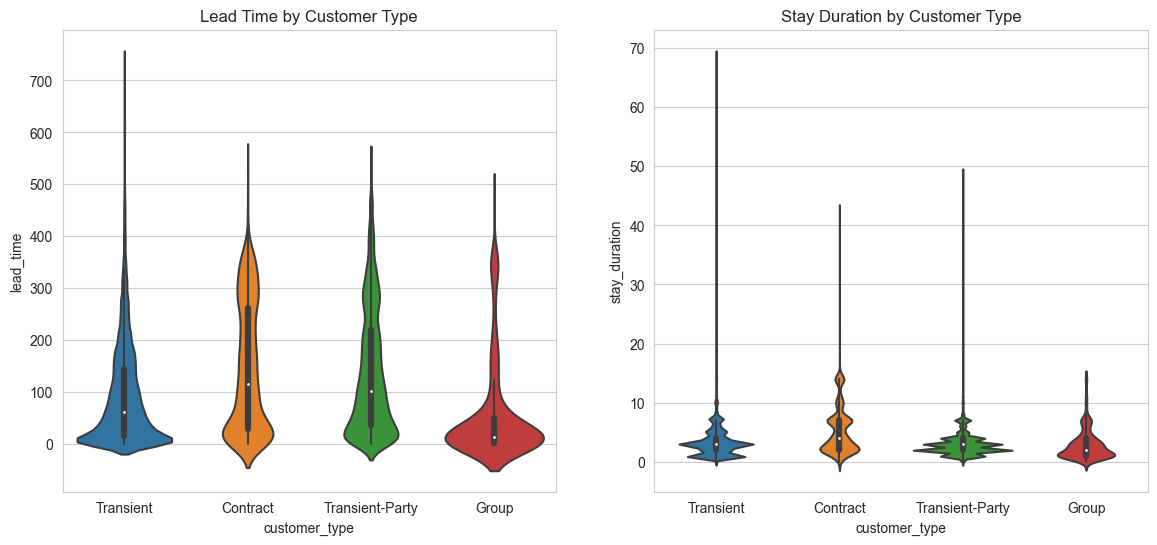

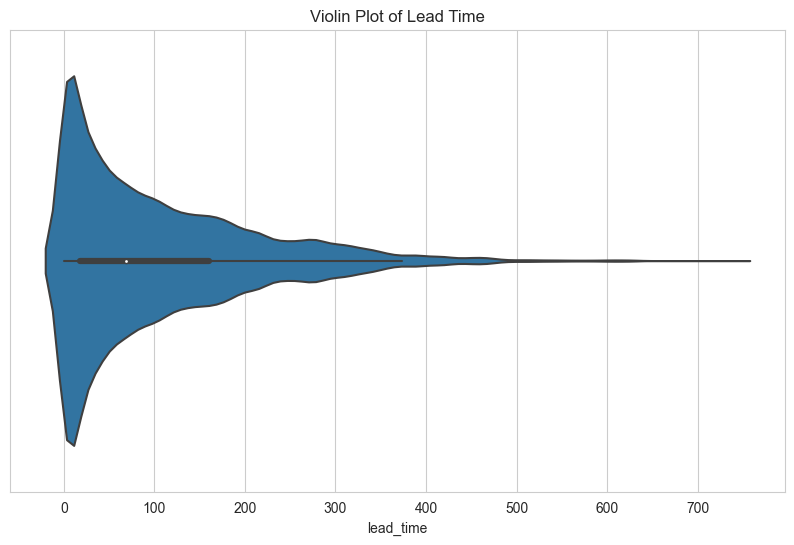

Outliers in Lead Time:
               hotel  is_canceled  lead_time  arrival_date_year  \
1       Resort Hotel            0        737               2016   
225     Resort Hotel            0        394               2015   
890     Resort Hotel            0        460               2016   
1516    Resort Hotel            0        381               2015   
1672    Resort Hotel            0        382               2015   
...              ...          ...        ...                ...   
119102    City Hotel            0        518               2016   
119107    City Hotel            0        518               2016   
119109    City Hotel            0        518               2017   
119111    City Hotel            0        518               2015   
119148    City Hotel            0        457               2015   

       arrival_date_month  arrival_date_week_number  \
1                    July                        27   
225                  July                        28   
890    

In [2]:
#Problem 3
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# KDE plots for lead time and stay duration
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df['lead_time'], shade=True)
plt.title('Distribution of Lead Time')

plt.subplot(1, 2, 2)
sns.kdeplot(df['stay_duration'], shade=True)
plt.title('Distribution of Stay Duration')
plt.show()

# Joint plot for lead time vs. stay duration
sns.jointplot(x='lead_time', y='stay_duration', hue='is_canceled', data=df, palette='coolwarm', kind='scatter')
plt.suptitle('Lead Time vs. Stay Duration', y=1.02)
plt.xlabel('Lead Time (days)')
plt.ylabel('Stay Duration (nights)')
plt.legend(title='Booking Canceled')
plt.show()

# Joint plot for stay duration vs lead time
sns.jointplot(x='lead_time', y='stays_in_week_nights', data=df, kind='scatter')
plt.suptitle('Scatter Plot of Lead Time vs. Stays in Week Nights', y=1.02)
plt.xlabel('Lead Time (days)')
plt.ylabel('Stays in Week Nights')
plt.show()

# KDE plot for lead time
plt.figure(figsize=(10, 6))
sns.kdeplot(df['lead_time'], shade=True)
plt.title('KDE Plot of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Density')
plt.show()

# Violin plots for visitor types
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time by Customer Type')

plt.subplot(1, 2, 2)
sns.violinplot(x='customer_type', y='stay_duration', data=df)
plt.title('Stay Duration by Customer Type')
plt.show()

# Violin plot to detect outliers in lead time
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['lead_time'])
plt.title('Violin Plot of Lead Time')
plt.show()

# Detecting outliers using IQR method for lead time
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lead_time_outliers = df[(df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR))]
print("Outliers in Lead Time:")
print(lead_time_outliers)

# Detecting outliers using IQR method for stay duration
Q1 = df['stay_duration'].quantile(0.25)
Q3 = df['stay_duration'].quantile(0.75)
IQR = Q3 - Q1
stay_duration_outliers = df[(df['stay_duration'] < (Q1 - 1.5 * IQR)) | (df['stay_duration'] > (Q3 + 1.5 * IQR))]
print("Outliers in Stay Duration:")
print(stay_duration_outliers)


Missing values in 'country' column: 0


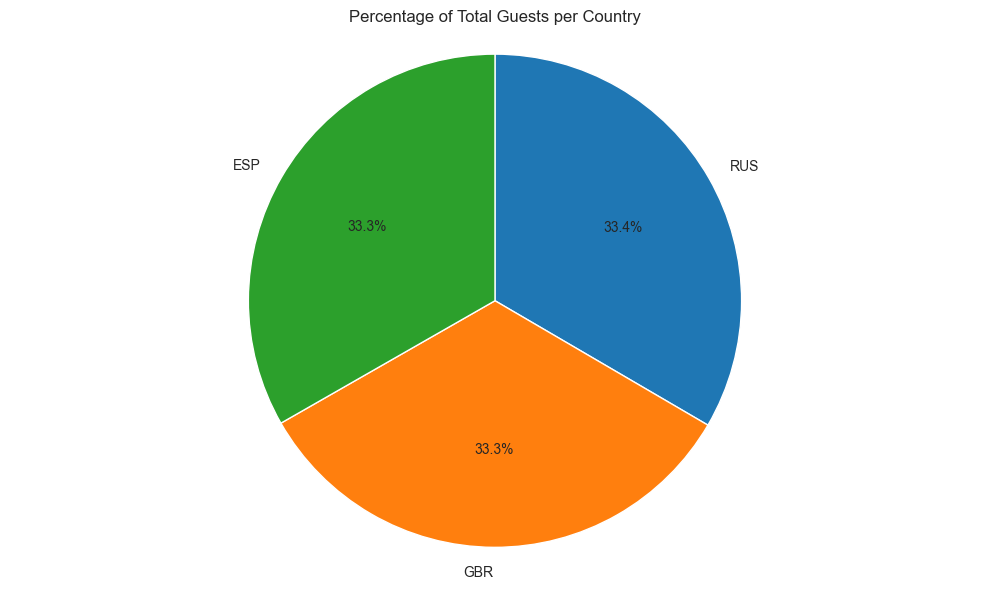


Countries with Percentage of Guests:
RUS    6.76
GBR    6.74
ESP    6.73
BRA    6.72
ITA    6.70
CHE    6.69
IND    6.66
USA    6.66
FRA    6.65
DEU    6.65
CHN    6.65
IRL    6.62
NLD    6.62
PRT    6.58
BEL    6.57
Name: country, dtype: float64


In [3]:
#Problem 4
# Check for missing values in the 'country' column
missing_countries = df['country'].isnull().sum()
print("Missing values in 'country' column:", missing_countries)

# Calculate the percentage of total guests per country
country_counts = df['country'].value_counts(normalize=True) * 100
top_countries = country_counts.head(3)

# Round off the percentages to 2 decimal places
country_counts = country_counts.round(2)
top_countries = top_countries.round(2)

# Visualize the results using a pie chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Percentage of Total Guests per Country')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Ensure the pie chart is a circle
plt.tight_layout()
plt.show()

# Report
print("\nCountries with Percentage of Guests:")
print(country_counts)


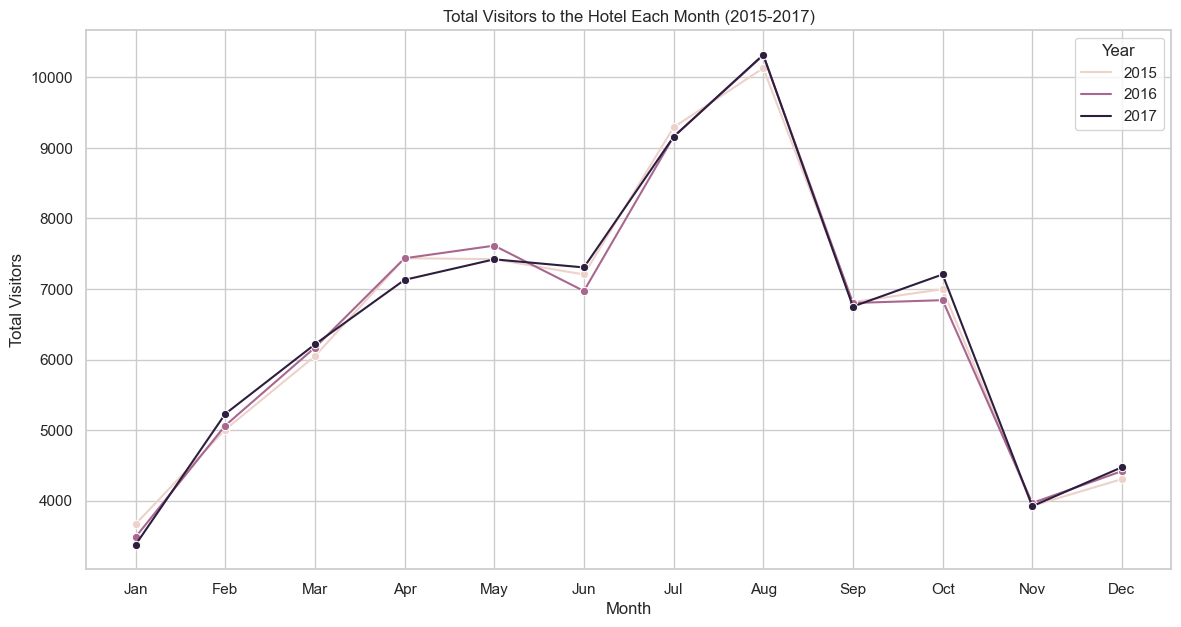

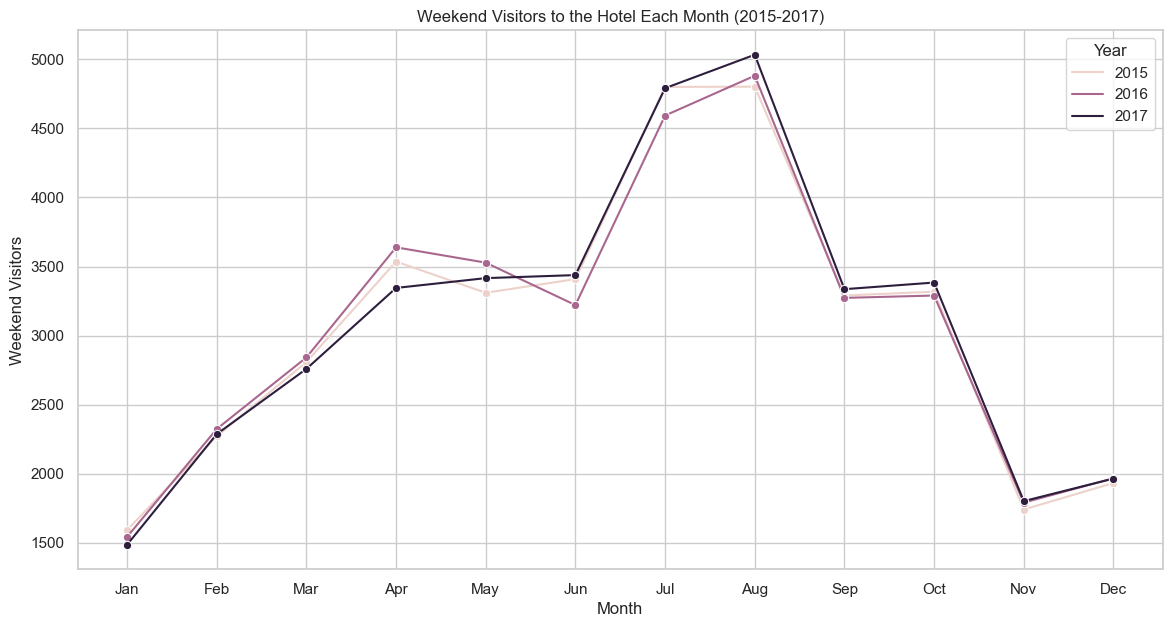

The year with the most weekend bookings is 2017 with 37042 weekend visitors.


In [10]:
#phase 3 
# problem 5 sql
#problem 6

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('HotelBooking Datasets.csv')

# Convert month names to numerical values for proper sorting
data['arrival_date_month_num'] = data['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})



# Group by year, month, and hotel to get total and weekend visitors
monthly_visitors = data.groupby(['arrival_date_year', 'arrival_date_month_num']).agg({
    'total_visitors': 'sum',
    'stays_in_weekend_nights': 'sum'
}).reset_index()

# Rename columns for clarity
monthly_visitors.rename(columns={
    'stays_in_weekend_nights': 'weekend_visitors'
}, inplace=True)

# Sort the data
monthly_visitors.sort_values(by=['arrival_date_year', 'arrival_date_month_num'], inplace=True)

# Set the plot style
sns.set(style='whitegrid')

# Create a line plot for total visitors
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_visitors, x='arrival_date_month_num', y='total_visitors', hue='arrival_date_year', marker='o')
plt.title('Total Visitors to the Hotel Each Month (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

# Create a line plot for weekend visitors
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_visitors, x='arrival_date_month_num', y='weekend_visitors', hue='arrival_date_year', marker='o')
plt.title('Weekend Visitors to the Hotel Each Month (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Weekend Visitors')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

# Aggregate weekend visitors by year
weekend_visitors_by_year = monthly_visitors.groupby('arrival_date_year')['weekend_visitors'].sum().reset_index()

# Identify the year with the most weekend bookings
most_weekend_bookings_year = weekend_visitors_by_year.loc[weekend_visitors_by_year['weekend_visitors'].idxmax()]

print(f"The year with the most weekend bookings is {most_weekend_bookings_year['arrival_date_year']} with {most_weekend_bookings_year['weekend_visitors']} weekend visitors.")


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0              

C:\Users\Anith\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


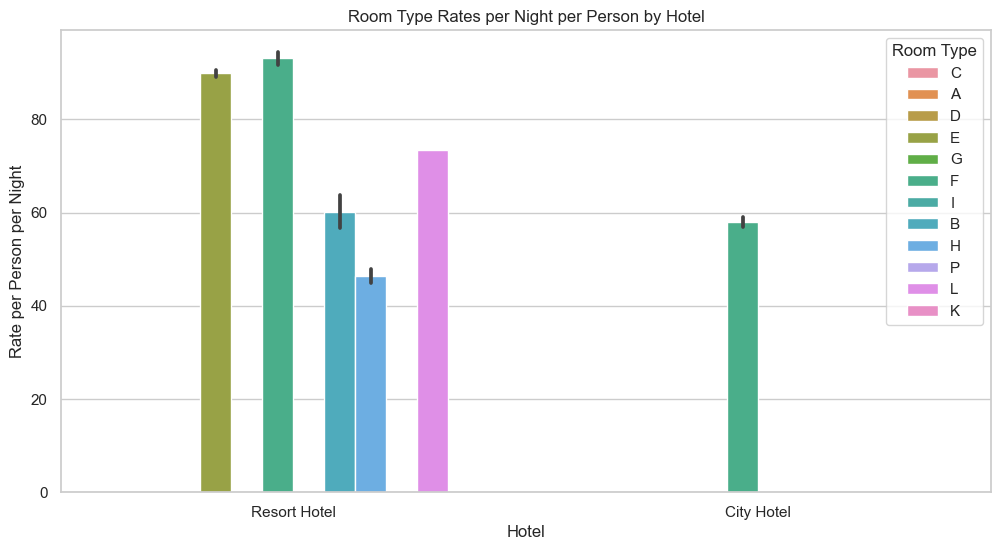

C:\Users\Anith\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


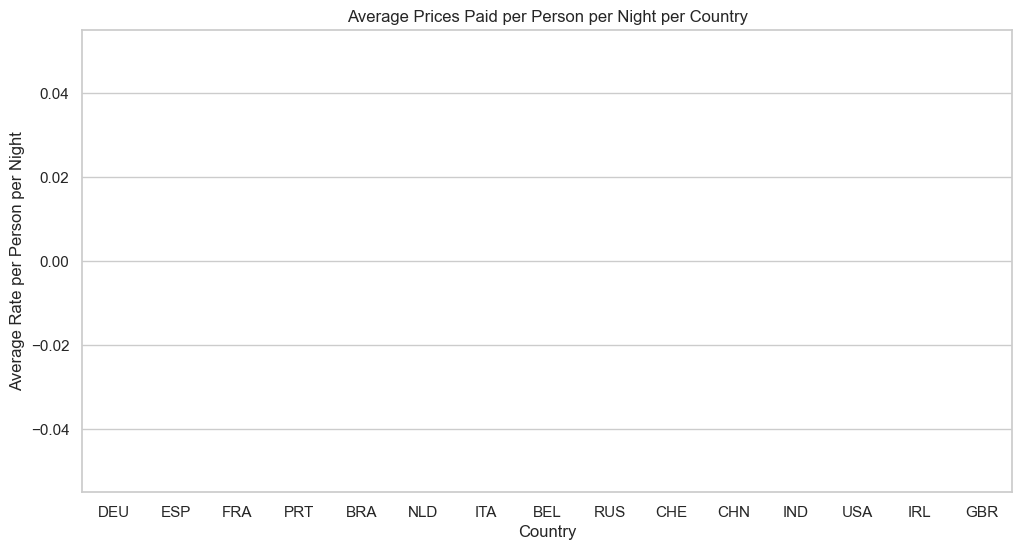

In [11]:
#problem 7
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Calculate the rate per night per person
df['rate_per_person_per_night'] = df['room_rate_per_night'] / df['total_visitors']

# Display the first few rows to check the new column
print(df.head())

# Bar plot: Room type rates per night per person by hotel
plt.figure(figsize=(12, 6))
sns.barplot(x='hotel', y='rate_per_person_per_night', hue='assigned_room_type', data=df)
plt.title('Room Type Rates per Night per Person by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Rate per Person per Night')
plt.legend(title='Room Type')
plt.show()

# Grouping the data by country to get the average rate per person per night
country_avg_rates = df.groupby('country')['rate_per_person_per_night'].mean().reset_index()

# Bar plot: Average prices paid per person per night per country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='rate_per_person_per_night', data=df)
plt.title('Average Prices Paid per Person per Night per Country')
plt.xlabel('Country')
plt.ylabel('Average Rate per Person per Night')
plt.show()


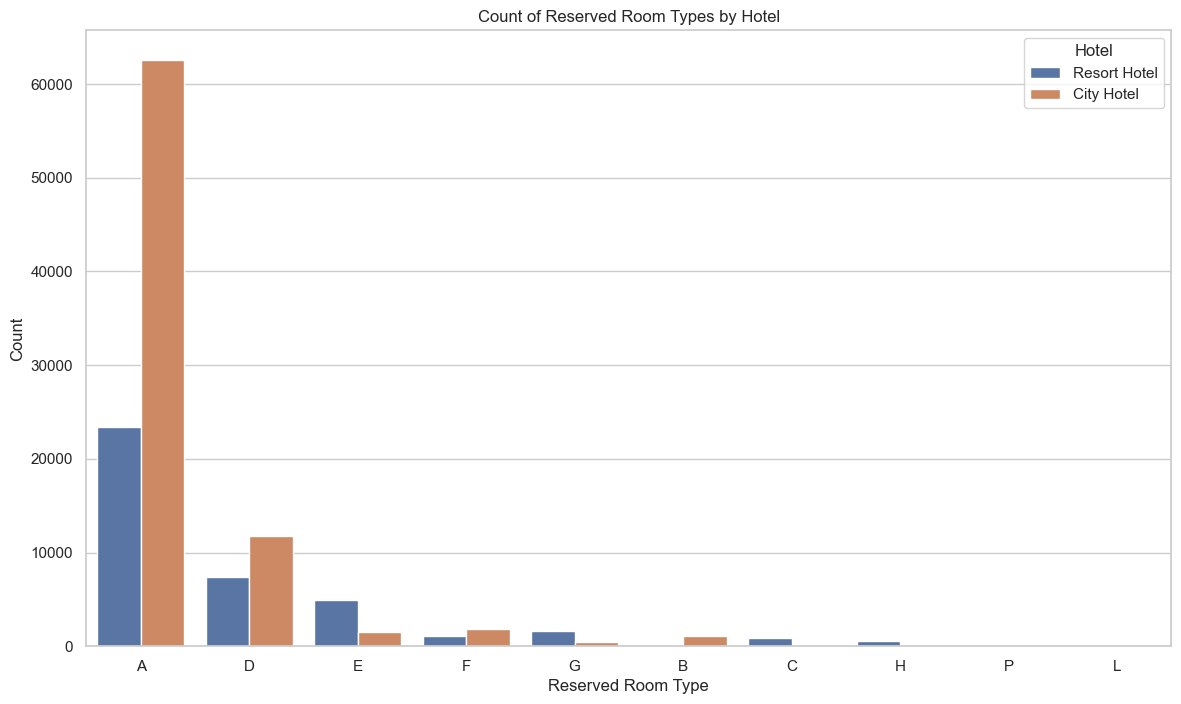

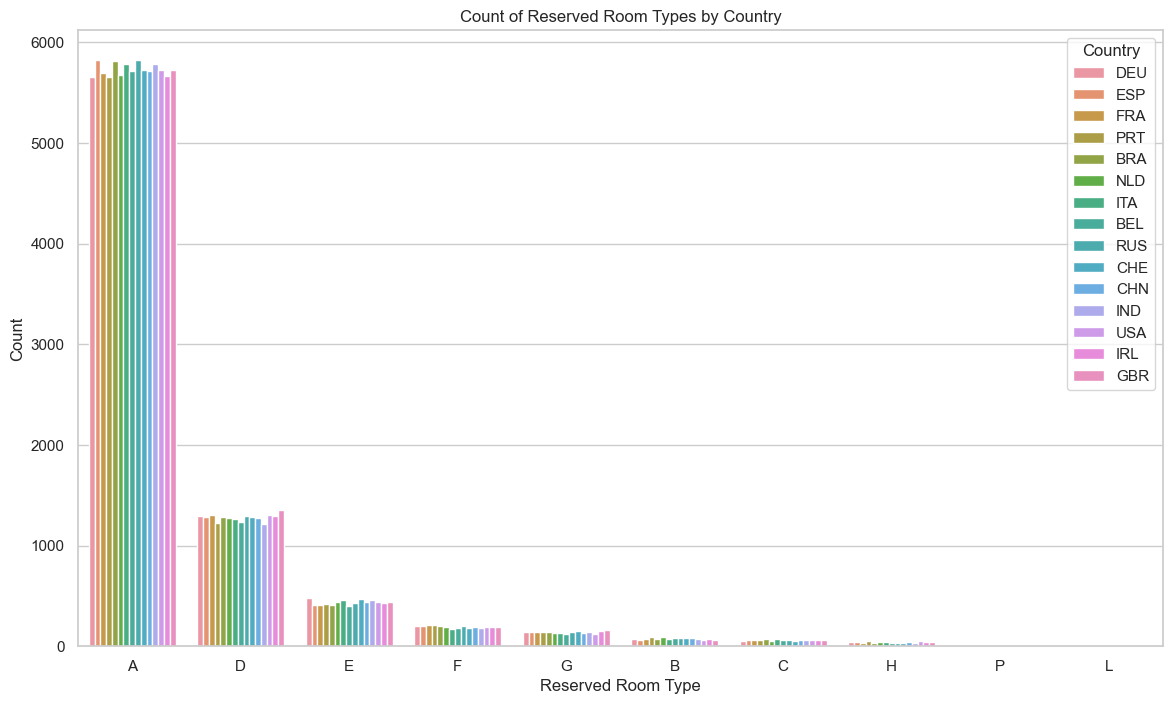

In [12]:
# problem 8
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HotelBooking Datasets.csv')

# Countplot: Reserved room type by hotel
plt.figure(figsize=(14, 8))
sns.countplot(x='reserved_room_type', hue='hotel', data=df, order=df['reserved_room_type'].value_counts().index)
plt.title('Count of Reserved Room Types by Hotel')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Hotel')
plt.show()

# Countplot: Reserved room type by country
plt.figure(figsize=(14, 8))
sns.countplot(x='reserved_room_type', hue='country', data=df, order=df['reserved_room_type'].value_counts().index)
plt.title('Count of Reserved Room Types by Country')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Country')
plt.show()


In [4]:
#Phase 5
import pandas as pd

# Load the dataset
# Assume the dataset is a CSV file named "hotel_bookings.csv"
file_path = 'HotelBooking Datasets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,total_of_special_requests,reservation_status,reservation_status_date,total_visitors,weekend_visitors,room_rate_per_night,rate_per_person_per_night,booking_date,guest_age_group,booking_channel
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,Check-Out,7/1/2015,2.0,False,138,69.0,2014-07-24,56-65,Travel Agent
1,Resort Hotel,0,737,2016,July,27,1,0,0,BB,...,0,Check-Out,7/1/2015,2.0,False,145,72.5,2013-06-24,66+,Online
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,Check-Out,7/2/2015,1.0,False,92,92.0,2015-06-25,36-45,Direct
3,Resort Hotel,0,13,2017,July,27,1,0,1,BB,...,0,Check-Out,7/2/2015,1.0,False,103,103.0,2015-06-19,36-45,Travel Agent
4,Resort Hotel,0,14,2016,July,27,1,0,2,BB,...,1,Check-Out,7/3/2015,2.0,False,109,54.5,2015-06-19,36-45,Direct


In [5]:
#Phase-5

# Check for missing values and data types
df.info()

# Select relevant columns for analysis
columns = ['country', 'market_segment', 'is_canceled']
df = df[columns]

# Drop rows with missing values in relevant columns
df = df.dropna(subset=columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         119390 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

<Figure size 2000x1200 with 0 Axes>

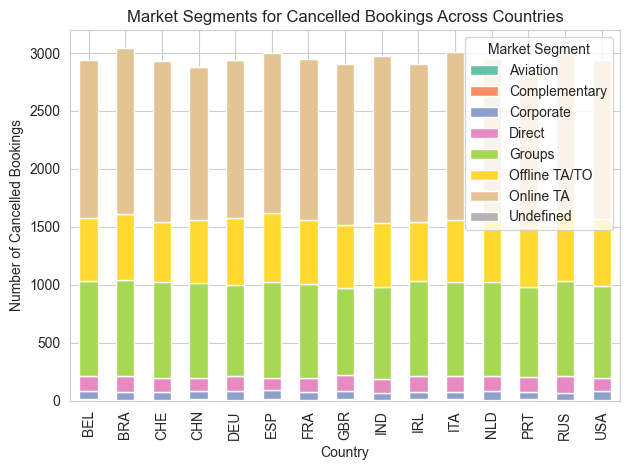

<Figure size 2000x1200 with 0 Axes>

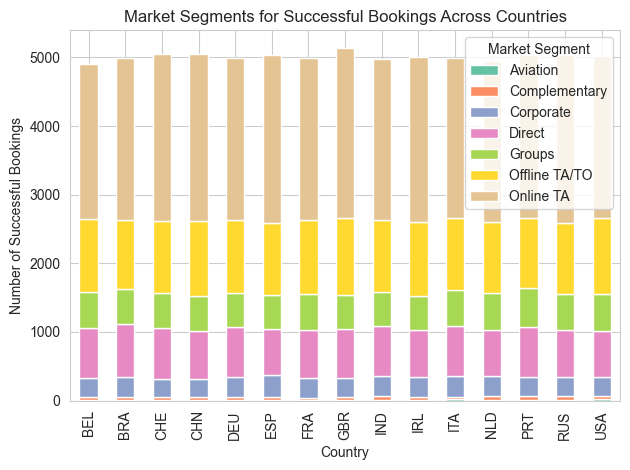

In [6]:
#problem 9
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by country and market_segment, then count the number of bookings
segment_counts = df.groupby(['country', 'market_segment', 'is_canceled']).size().reset_index(name='count')

# Separate data for canceled and successful bookings
cancelled = segment_counts[segment_counts['is_canceled'] == 1]
successful = segment_counts[segment_counts['is_canceled'] == 0]

# Pivot the data for stacked bar plots
cancelled_pivot = cancelled.pivot(index='country', columns='market_segment', values='count').fillna(0)
successful_pivot = successful.pivot(index='country', columns='market_segment', values='count').fillna(0)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a color palette
colors = sns.color_palette("Set2")

# Plot for cancelled bookings
plt.figure(figsize=(20, 12))
cancelled_pivot.plot(kind='bar', stacked=True, color=colors)
plt.title('Market Segments for Cancelled Bookings Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Cancelled Bookings')
plt.legend(title='Market Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for successful bookings
plt.figure(figsize=(20, 12))
successful_pivot.plot(kind='bar', stacked=True, color=colors)
plt.title('Market Segments for Successful Bookings Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Successful Bookings')
plt.legend(title='Market Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

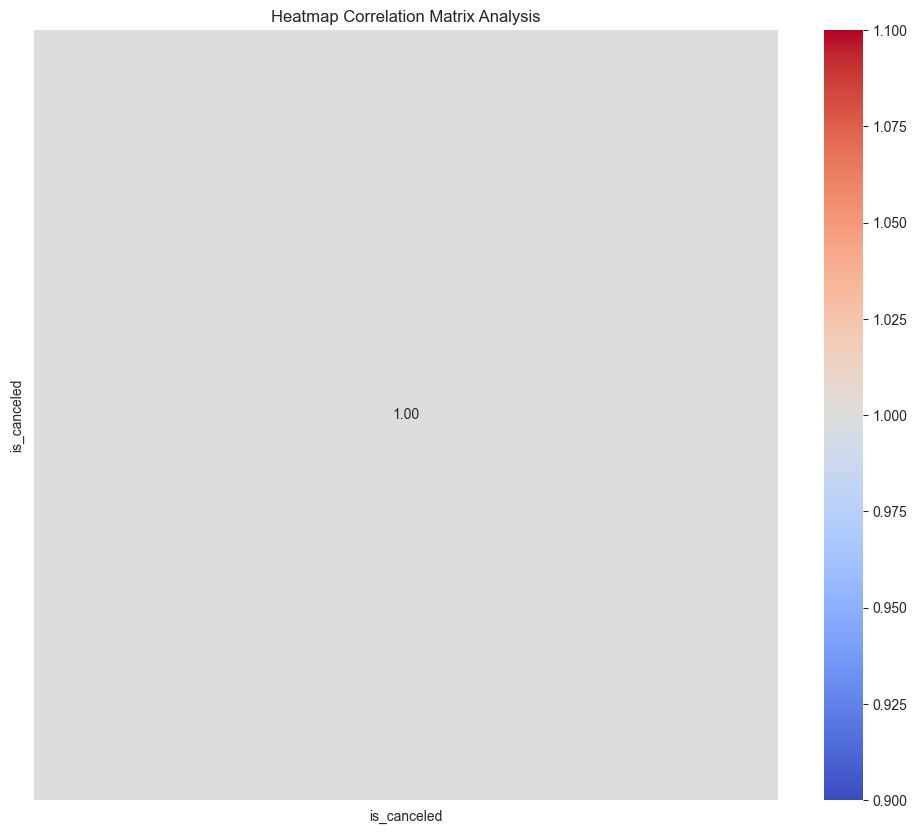

Interpretation of Correlation Matrix:
             is_canceled
is_canceled          1.0

Detailed Report:
Correlation Matrix Analysis:
             is_canceled
is_canceled          1.0


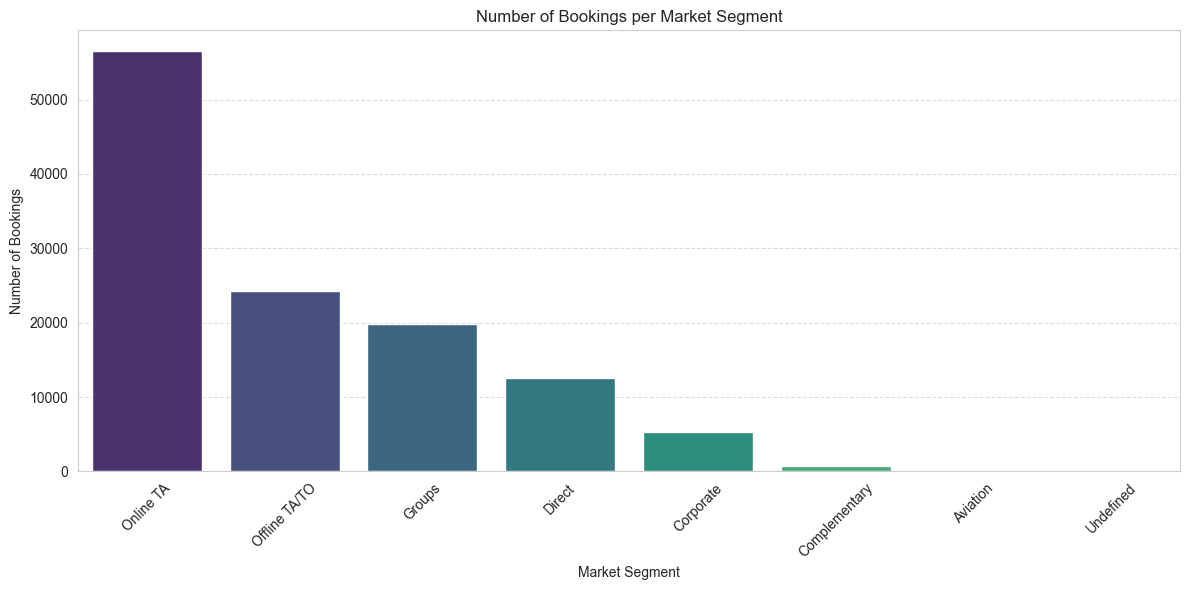

In [8]:
#problem 10
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Matrix Analysis')
plt.show()

# Interpret the correlations
print("Interpretation of Correlation Matrix:")
print(correlation_matrix)

# Provide a detailed report
print("\nDetailed Report:")
print("Correlation Matrix Analysis:")
print(correlation_matrix)

# Create a bar chart for the number of bookings per market segment
plt.figure(figsize=(12, 6))
market_segment_counts = df['market_segment'].value_counts()
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')
plt.title('Number of Bookings per Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_visitors',
       'weekend_visitors', 'room_rate_per_night', 'rate_per_person_per_night',
       'booking_date', 'guest_age_group', 'booking_channel'],
      dtype='object')
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1

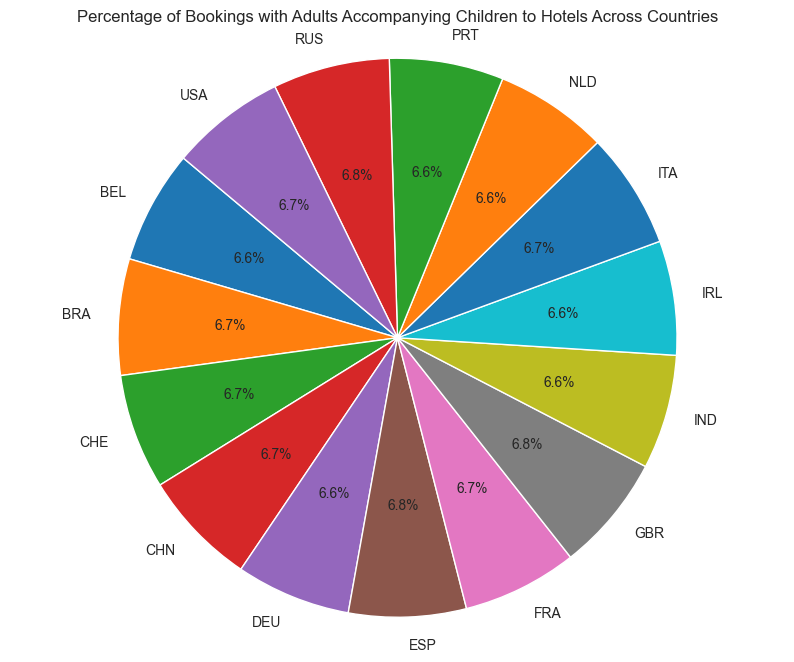

In [9]:
#Problem 11
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('HotelBooking Datasets.csv')

# Inspect the first few rows of the dataset to identify the correct columns
print(df.columns)
print(df.head())

# Calculate the number of bookings where adults are accompanying children
# Assuming total_visitors > 1 indicates presence of both adults and children
df['adults_accompanying_children'] = df['total_visitors'].apply(lambda x: 1 if x > 1 else 0)

# Group by country and sum up the number of bookings with adults accompanying children
country_accompaniment = df.groupby('country')['adults_accompanying_children'].sum()

# Filter out countries with zero accompaniment for clarity in the pie chart
country_accompaniment = country_accompaniment[country_accompaniment > 0]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(country_accompaniment, labels=country_accompaniment.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Bookings with Adults Accompanying Children to Hotels Across Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

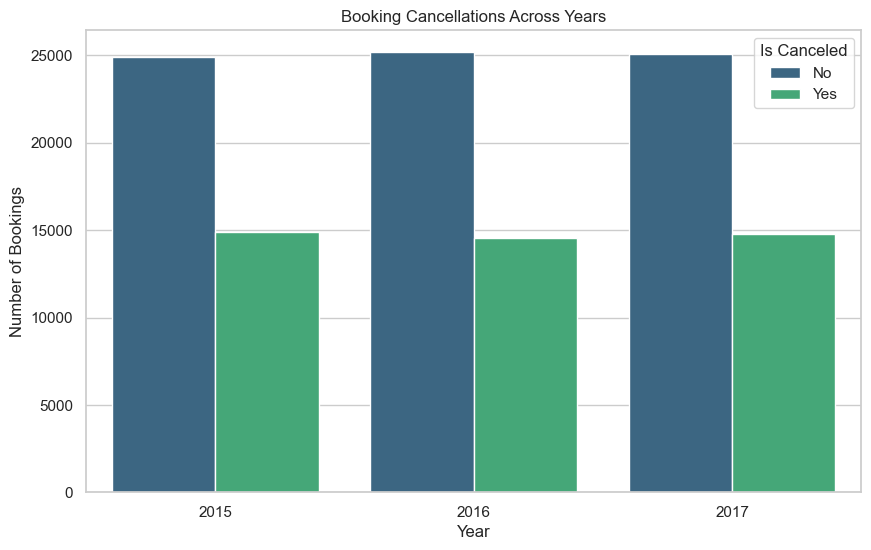

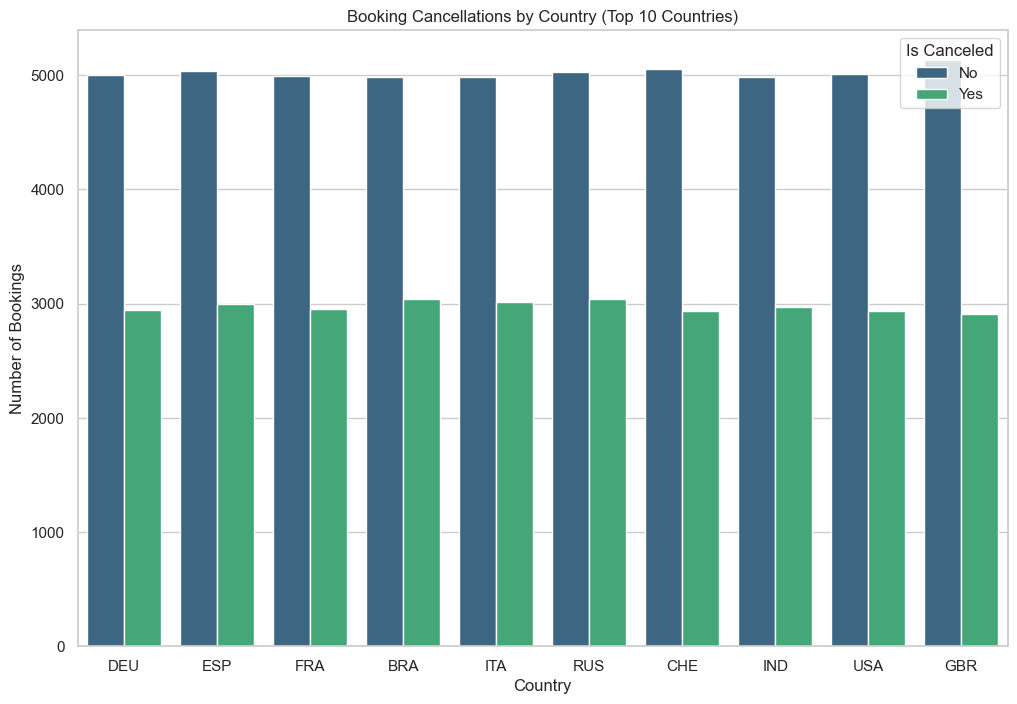

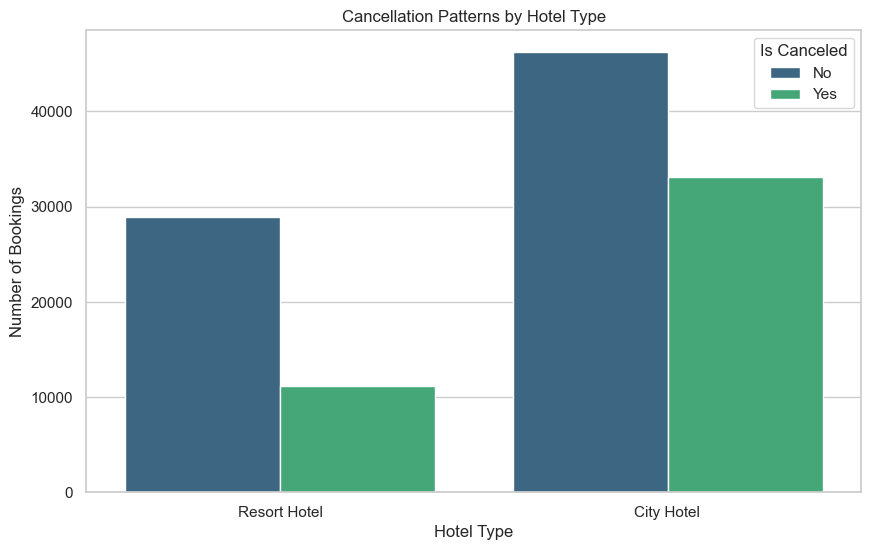

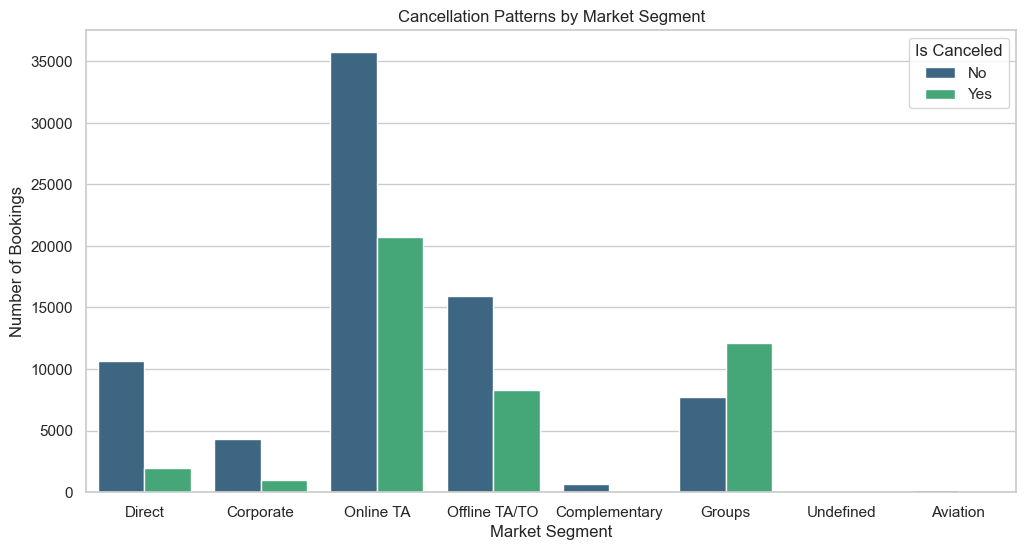

In [16]:
#problem 12
# Filter the necessary columns
df_filtered = df[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'country', 'market_segment']]

# Visualization
# 1. Booking cancellations across years
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='arrival_date_year', hue='is_canceled', palette='viridis')
plt.title('Booking Cancellations Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()

# 2. Booking cancellations by country
plt.figure(figsize=(12, 8))
top_countries = df_filtered['country'].value_counts().head(10).index
sns.countplot(data=df_filtered[df_filtered['country'].isin(top_countries)], x='country', hue='is_canceled', palette='viridis')
plt.title('Booking Cancellations by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()

# 3. Cancellation patterns by hotel type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='hotel', hue='is_canceled', palette='viridis')
plt.title('Cancellation Patterns by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()

# 4. Cancellation patterns by market segment
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='market_segment', hue='is_canceled', palette='viridis')
plt.title('Cancellation Patterns by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()